# 결정 트리(Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()

In [2]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

In [3]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

### 모델 시각화

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file='tree.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

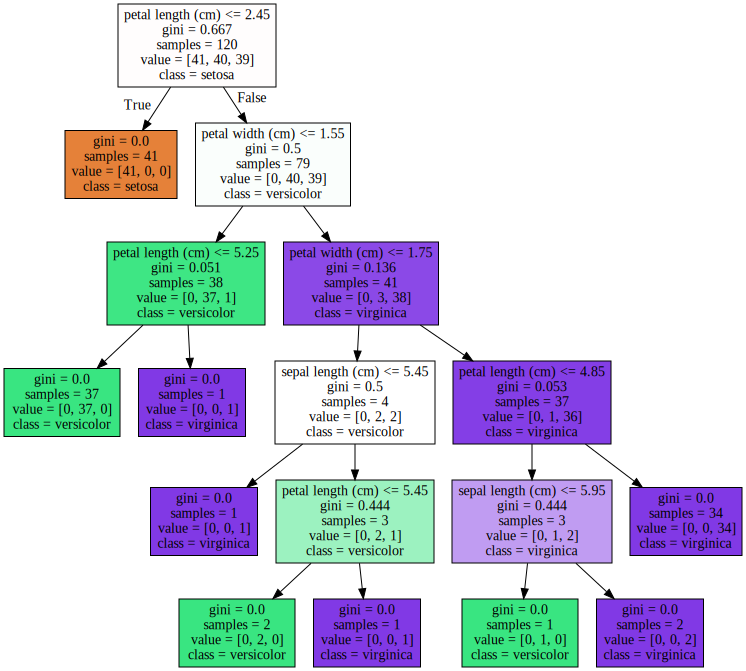

In [5]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [6]:
dt_pred = dt_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_pred)

0.9333333333333333

### 제약 조건
- max_depth = 3

In [8]:
dt_clf2 = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [9]:
export_graphviz(dt_clf2, out_file='tree2.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)

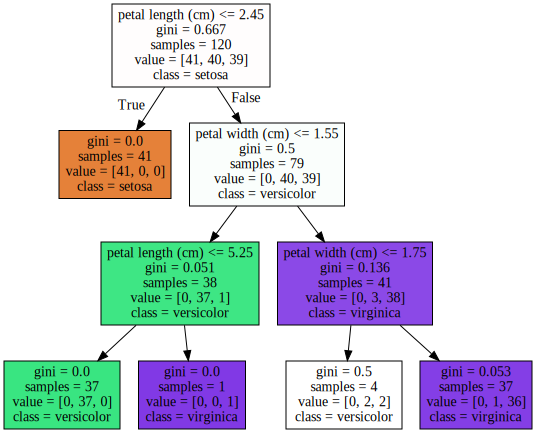

In [10]:
with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
dt_pred2 = dt_clf2.predict(X_test)
accuracy_score(y_test, dt_pred2)

0.9333333333333333

- min_samples_split = 4

In [12]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=4, random_state=156)
dt_clf3.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

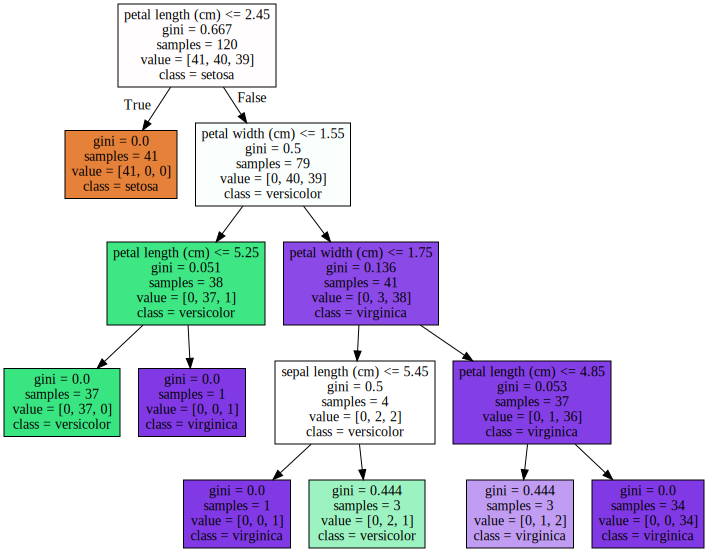

In [14]:
export_graphviz(dt_clf3, out_file='tree3.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree3.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [15]:
dt_pred3 = dt_clf3.predict(X_test)
accuracy_score(y_test, dt_pred3)

0.9333333333333333

- min_samples_leaf = 4

In [16]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf4.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

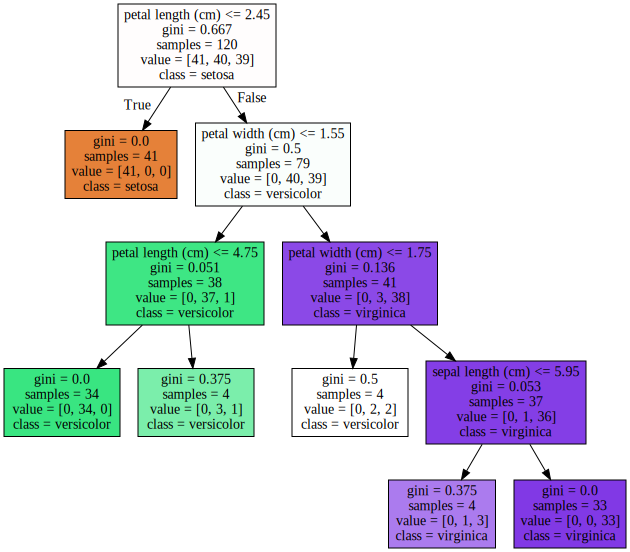

In [17]:
export_graphviz(dt_clf4, out_file='tree4.dot', class_names=iris.target_names, feature_names=iris.feature_names, impurity=True, filled=True)
with open('tree4.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
dt_pred4 = dt_clf4.predict(X_test)
accuracy_score(y_test, dt_pred4)

0.9333333333333333

### feature 중요도

In [19]:
print(dt_clf.feature_importances_)
print(dt_clf2.feature_importances_)
print(dt_clf3.feature_importances_)
print(dt_clf4.feature_importances_)

[0.02500521 0.         0.55490281 0.42009198]
[0.         0.         0.55810743 0.44189257]
[0.00862255 0.         0.55679642 0.43458103]
[0.00594727 0.         0.5459484  0.44810433]


In [20]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [21]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(f'{name}: {value:.4f}')

sepal length (cm): 0.0250
sepal width (cm): 0.0000
petal length (cm): 0.5549
petal width (cm): 0.4201


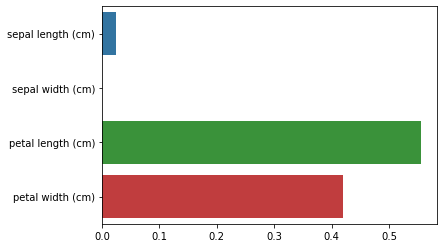

In [22]:
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names);

In [23]:
import pandas as pd
df = pd.DataFrame({
    'name': iris.feature_names,
    '제약 무': dt_clf.feature_importances_,
    'max_depth = 3': dt_clf2.feature_importances_,
    'min_samples_split = 4': dt_clf3.feature_importances_,
    'min_samples_leaf = 4': dt_clf4.feature_importances_
})
df

,name,제약 무,max_depth = 3,min_samples_split = 4,min_samples_leaf = 4
0,sepal length (cm),0.025005,0.000000,0.008623,0.005947
1,sepal width (cm),0.000000,0.000000,0.000000,0.000000
2,petal length (cm),0.554903,0.558107,0.556796,0.545948
3,petal width (cm),0.420092,0.441893,0.434581,0.448104


### 과적합

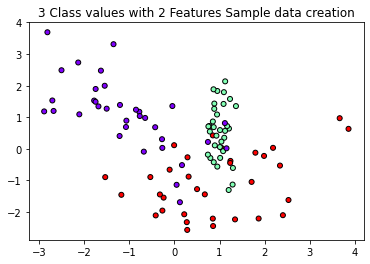

In [25]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

X_features, y_labels = make_classification(
    n_features=2, n_redundant=0, n_informative=2,
    n_classes=3, n_clusters_per_class=1, random_state=0
)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolors='k')
plt.show()